## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Set data directories

In [2]:
dataDir = "./data/"
datafile = "dar-cmand1DR-20201127"

## Load in CSV data
This data has been extracted in matlab and formatted for other uses

In [3]:
data = pd.read_csv(dataDir+datafile+"_stopBeh.csv")

## Extract stopping summaries

Create a function to extract the summary data at each stop-signal delay. 

Let's see if we can make this into a standalone .py script

Run the function above, and split the tuple output into three components for future plotting

In [4]:
from stop_beh_main import get_stop_basics
(ssd, pnc, ntr) = get_stop_basics(data)

## Split data by value/reward condition

In [5]:
df_highValue = data.loc[data['value'] == 1]
df_lowValue = data.loc[data['value'] == 0]

In [6]:
(ssd_high, pnc_high, ntr_high) = get_stop_basics(df_highValue)
(ssd_low, pnc_low, ntr_low) = get_stop_basics(df_lowValue)

## Generate inhbition function figure

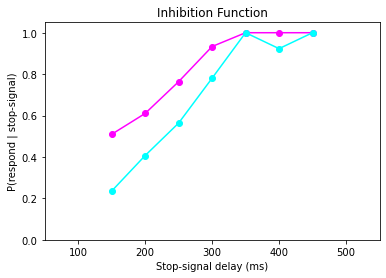

In [7]:
# Input data
x_1 = np.array(ssd_high); y_1 = np.array(pnc_high)
x_2 = np.array(ssd_low); y_2 = np.array(pnc_low)

# Initiate plot type
plt.plot(x_1, y_1, marker = 'o', color = 'magenta')
plt.plot(x_2, y_2, marker = 'o', color = 'cyan')

# Decorate plot
plt.title("Inhibition Function")
plt.xlabel("Stop-signal delay (ms)")
plt.ylabel("P(respond | stop-signal)")

plt.xlim(50,550); plt.ylim(0,1.05)

# Generate plot
plt.show()

## Extract GO response times

In [20]:
# Get logged response times (RT) from the main dataframe, on trials in which no-stop-signal was presented
nostop_rt = data["rt"].loc[data["ss_presented"] == 0]

nostop_rt_high = df_highValue["rt"].loc[df_highValue["ss_presented"] == 0]
nostop_rt_low = df_lowValue["rt"].loc[df_lowValue["ss_presented"] == 0]


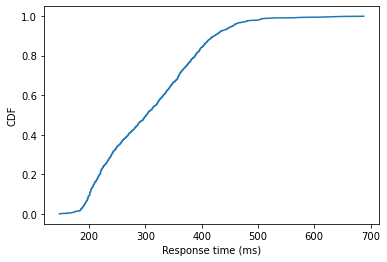

In [9]:
# Generate the cumulative distribution function for these RT's (on all trials)
n_ns_trls = len(nostop_rt)
rt_sorted = np.sort(nostop_rt)
rt_cdf = np.arange(n_ns_trls) / float(n_ns_trls)

plt.xlabel("Response time (ms)")
plt.ylabel("CDF");
plt.plot(rt_sorted,rt_cdf)

## Estimate SSRT

In [21]:
# Generate a function to find the RT corresponding to xth percentile of the CDF corresponding to the p(respond|stop-signal) at the given SSD.
from stop_beh_main import find_nearest_rt
from stop_beh_main import get_ssrtIntWeight

stoppingBeh = {'high': {'ssd': ssd_high, 'pnc': pnc_high, 'ntr': ntr_high, 'nostop_rt': nostop_rt_high},
               'low':  {'ssd': ssd_low, 'pnc': pnc_low, 'ntr': ntr_low, 'nostop_rt': nostop_rt_low}}


ssrt = {}
ssrt["high"] = get_ssrtIntWeight(stoppingBeh["high"])
ssrt["low"] = get_ssrtIntWeight(stoppingBeh["low"])
